In [86]:
from keras.utils import np_utils #import utilities from the keras
from keras.datasets import mnist #loading mnist dataset
import seaborn as sns #seaborn library for plotting
from keras.initializers import RandomNormal #to intializer weights we have an inbuild keras library and from that we are importing randomnormal initializer

In [87]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [88]:
# the data, shuffled and split between train and test sets 
#loading the mnist data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [89]:
X_train.shape

(60000, 28, 28)

In [90]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [91]:
# if you observe the input shape its 2 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [92]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [93]:
# An example data point
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

The above matrix is a greyscale image 28*28 pixel image with values ranging from 0 to 255 with 0 as white and as we move from 0 to 255 it turns from white to grey to black

In [94]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [95]:
# example data point after normlizing
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [96]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) #from np.utils we used to the function to_categorical to convert our output into a one-hot encoded vector
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# Softmax classifier 

In [97]:
# https://keras.io/getting-started/sequential-model-guide/

# The Sequential model is a linear stack of layers.Each Layer has exactly one input tensor and one output tensor 
# you can create a Sequential model by passing a list of layer instances to the constructor:

# model = Sequential([
#     Dense(32, input_shape=(784,)),
#     Activation('relu'),
#     Dense(10),
#     Activation('softmax'),
# ])

# You can also simply add layers via the .add() method:

# model = Sequential()
# model.add(Dense(32, input_dim=784))
# model.add(Activation('relu'))

###

# https://keras.io/layers/core/

# keras.layers.Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', 
# bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, 
# kernel_constraint=None, bias_constraint=None)

# Dense implements the operation: output = activation(dot(input, kernel) + bias) where
# activation is the element-wise activation function passed as the activation argument, 
# kernel is a weights matrix created by the layer, and 
# bias is a bias vector created by the layer (only applicable if use_bias is True).

# output = activation(dot(input, kernel) + bias)  => y = activation(WT. X + b)

####

# https://keras.io/activations/

# Activations can either be used through an Activation layer, or through the activation argument supported by all forward layers:

# from keras.layers import Activation, Dense

# model.add(Dense(64))
# model.add(Activation('tanh'))

# This is equivalent to:
# model.add(Dense(64, activation='tanh'))

# there are many activation functions ar available ex: tanh, relu, softmax


from keras.models import Sequential #importing a sequential model
from keras.layers import Dense, Activation #importing dense and also activation to use activation functions


In [98]:
# some model parameters

output_dim = 10 #since we have to class numbers from 0 to 9 we have output dimension as 10
input_dim = X_train.shape[1] #input dimension will the image i.e. 784(28*28 px image)
print(input_dim)

batch_size = 128 #used a batch size of 128
nb_epoch = 20 #number of epochs is 28

784


**<h2> ReLU + Adam Optimization + 2 Hidden Layers (without Dropout and Batch Normalization)</h2>**

<h3> Hidden layer 1 consists of 256 outputs and Hidden Layer2 consists of 64 connections </h3>

In [99]:
model_relu = Sequential()
model_relu.add(Dense(256, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_59 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_60 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_61 (Dense)             (None, 10)                650       
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 55us/step - loss: 0.2779 - accuracy: 0.9176 - val_loss: 0.1286 - val_accuracy: 0.9611
Epoch 2/20
60000/60000 [==============================] - 3s 53us/step - loss: 0.1073 - accuracy: 0.9682 - val_loss: 0.0953 - val_accuracy: 0.9702
Epoch 3/20
60000/60000 [====

Test score: 0.08999803272318979
Test accuracy: 0.9807999730110168


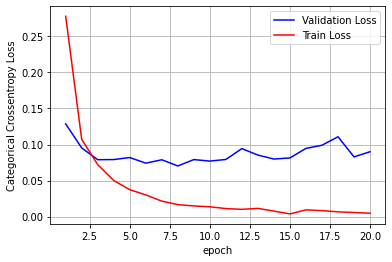

In [100]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

after epoch 5 there is not much change in the validation loss whereas our train loss keeps on decreasing around 14 epochs after there is not much change 

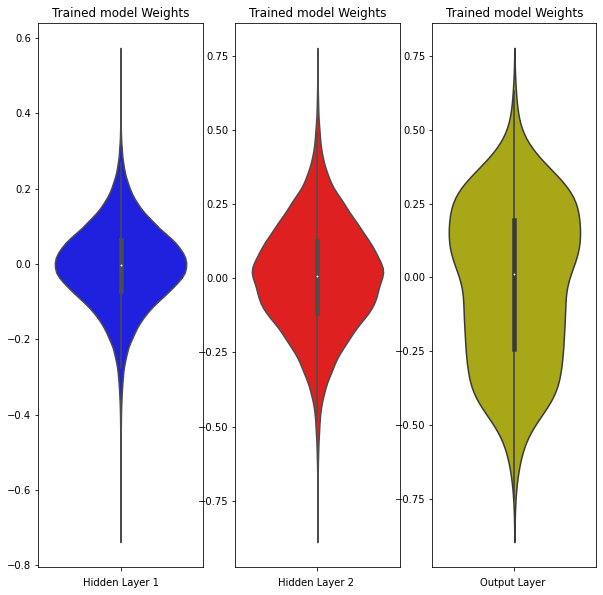

In [101]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure(figsize=(10,10))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

**<h2> ReLU + Adam Optimization + 3 Hidden Layers (without Dropout and Batch Normalization)</h2>**

<h3> Hidden layer 1 consists of 512 outputs and Hidden Layer2 consists of 256   outputs, Hidden Layer 3 consists of 128 outputs </h3>

In [102]:
# Multilayer perceptron

model_relu = Sequential() #says we want a sequential model
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dense(256, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()#prints the summary 

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_62 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_63 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_64 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_65 (Dense)             (None, 10)                1290      
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________


In [103]:
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 121us/step - loss: 0.2373 - accuracy: 0.9292 - val_loss: 0.1105 - val_accuracy: 0.9657
Epoch 2/20
60000/60000 [==============================] - 7s 118us/step - loss: 0.0871 - accuracy: 0.9735 - val_loss: 0.0991 - val_accuracy: 0.9703
Epoch 3/20
60000/60000 [==============================] - 7s 119us/step - loss: 0.0554 - accuracy: 0.9830 - val_loss: 0.0782 - val_accuracy: 0.9770
Epoch 4/20
60000/60000 [==============================] - 7s 118us/step - loss: 0.0397 - accuracy: 0.9877 - val_loss: 0.0740 - val_accuracy: 0.9783
Epoch 5/20
60000/60000 [==============================] - 7s 118us/step - loss: 0.0319 - accuracy: 0.9891 - val_loss: 0.0766 - val_accuracy: 0.9777
Epoch 6/20
60000/60000 [==============================] - 7s 118us/step - loss: 0.0251 - accuracy: 0.9920 - val_loss: 0.0751 - val_accuracy: 0.9794
Epoch 7/20
60000/60000 [==============================] - 7s 1

Test score: 0.10256570401383279
Test accuracy: 0.9800999760627747


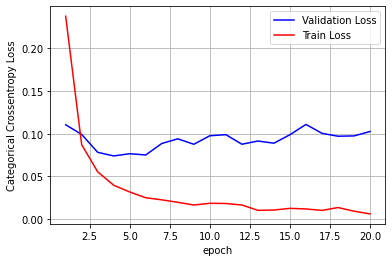

In [104]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

after epoch 3 we ca see jagged lines in our validation loss whereas our train loss keeps on decreasing around 15 epochs after there is not much change 

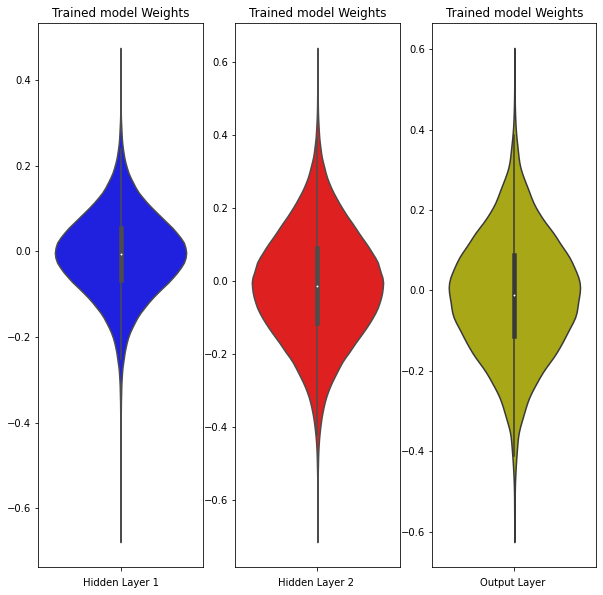

In [105]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure(figsize=(10,10))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

**<h1> ReLU + Adam Optimization + 5 Hidden Layers (without Dropout and Batch Normalization)</h1>**

<h3> Hidden layer 1 consists of 512 outputs and Hidden Layer2 consists of 256   outputs, Hidden Layer 3 consists of 128 outputs ,Hidden Layer 4 consists of 64 outputs,Hidden Layer 5 consists of 32 outputs </h3>

In [106]:
# Multilayer perceptron

model_relu = Sequential() #says we want a sequential model
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dense(256, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(32, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()#prints the summary 

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_66 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_67 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_68 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_69 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_70 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_71 (Dense)             (None, 10)                330       
Total params: 576,810
Trainable params: 576,810
Non-trainable params: 0
_______________________________________________

In [107]:
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 130us/step - loss: 0.2782 - accuracy: 0.9158 - val_loss: 0.1288 - val_accuracy: 0.9611
Epoch 2/20
60000/60000 [==============================] - 8s 127us/step - loss: 0.0949 - accuracy: 0.9704 - val_loss: 0.1105 - val_accuracy: 0.9667
Epoch 3/20
60000/60000 [==============================] - 8s 127us/step - loss: 0.0642 - accuracy: 0.9791 - val_loss: 0.0897 - val_accuracy: 0.9722
Epoch 4/20
60000/60000 [==============================] - 8s 125us/step - loss: 0.0463 - accuracy: 0.9853 - val_loss: 0.0894 - val_accuracy: 0.9732
Epoch 5/20
60000/60000 [==============================] - 8s 126us/step - loss: 0.0377 - accuracy: 0.9880 - val_loss: 0.0833 - val_accuracy: 0.9776
Epoch 6/20
60000/60000 [==============================] - 8s 126us/step - loss: 0.0296 - accuracy: 0.9906 - val_loss: 0.0791 - val_accuracy: 0.9789
Epoch 7/20
60000/60000 [==============================] - 8s 1

Test score: 0.07623335870537294
Test accuracy: 0.9822999835014343


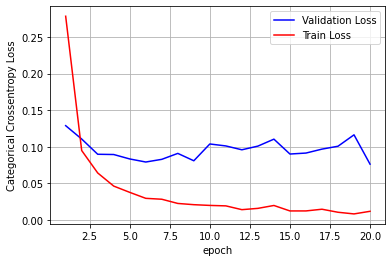

In [108]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

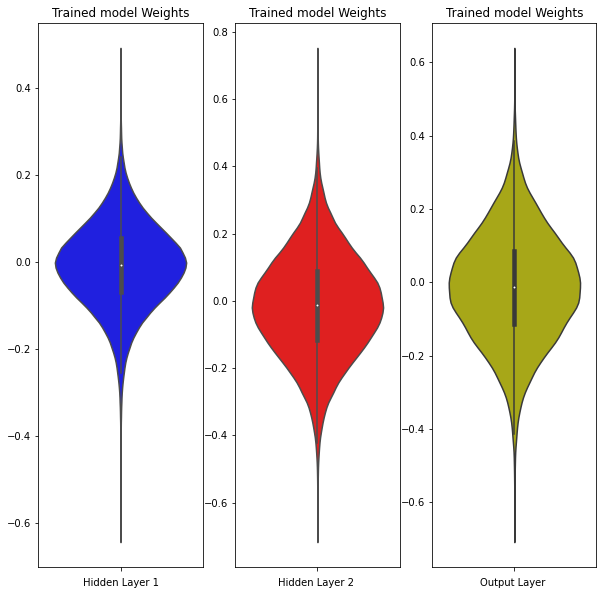

In [109]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure(figsize=(10,10))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

**<h2> ReLU + Adam Optimization + 2 Hidden Layers (Batch Normalization)</h2>**

In [110]:
from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_batch.add(Dense(256, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_72 (Dense)             (None, 256)               200960    
_________________________________________________________________
batch_normalization_23 (Batc (None, 256)               1024      
_________________________________________________________________
dense_73 (Dense)             (None, 64)                16448     
_________________________________________________________________
batch_normalization_24 (Batc (None, 64)                256       
_________________________________________________________________
dense_74 (Dense)             (None, 10)                650       
Total params: 219,338
Trainable params: 218,698
Non-trainable params: 640
_________________________________________________________________


In [111]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 68us/step - loss: 0.2419 - accuracy: 0.9304 - val_loss: 0.1283 - val_accuracy: 0.9619
Epoch 2/20
60000/60000 [==============================] - 4s 62us/step - loss: 0.0953 - accuracy: 0.9719 - val_loss: 0.0932 - val_accuracy: 0.9709
Epoch 3/20
60000/60000 [==============================] - 4s 62us/step - loss: 0.0639 - accuracy: 0.9810 - val_loss: 0.0881 - val_accuracy: 0.9730
Epoch 4/20
60000/60000 [==============================] - 4s 63us/step - loss: 0.0484 - accuracy: 0.9849 - val_loss: 0.0840 - val_accuracy: 0.9735
Epoch 5/20
60000/60000 [==============================] - 4s 61us/step - loss: 0.0363 - accuracy: 0.9890 - val_loss: 0.0958 - val_accuracy: 0.9703
Epoch 6/20
60000/60000 [==============================] - 4s 62us/step - loss: 0.0284 - accuracy: 0.9913 - val_loss: 0.0855 - val_accuracy: 0.9730
Epoch 7/20
60000/60000 [==============================] - 4s 61us/st

Test score: 0.09346026394422224
Test accuracy: 0.9767000079154968


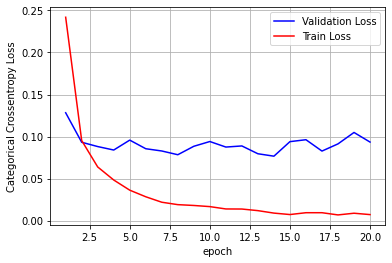

In [112]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

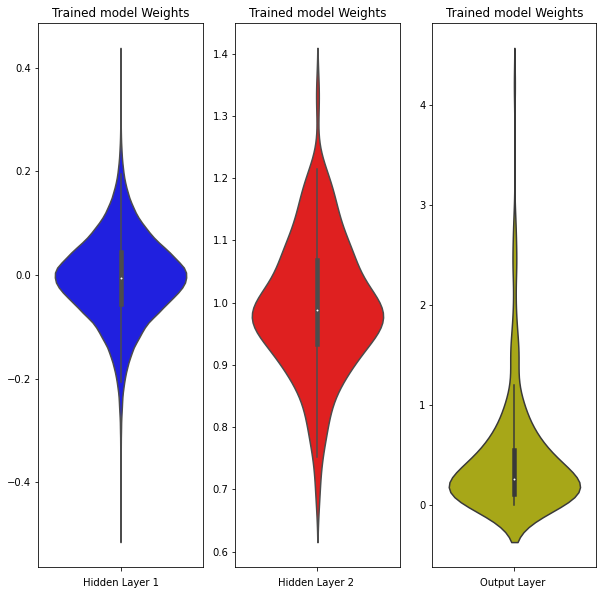

In [113]:
w_after = model_batch.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure(figsize=(10,10))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

**<h2> ReLU + Adam Optimization + 3 Hidden Layers (Batch Normalization)</h2>**

In [114]:
from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_batch.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(256, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_75 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_25 (Batc (None, 512)               2048      
_________________________________________________________________
dense_76 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_26 (Batc (None, 256)               1024      
_________________________________________________________________
dense_77 (Dense)             (None, 128)               32896     
_________________________________________________________________
batch_normalization_27 (Batc (None, 128)               512       
_________________________________________________________________
dense_78 (Dense)             (None, 10)              

In [115]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 148us/step - loss: 0.2114 - accuracy: 0.9378 - val_loss: 0.1119 - val_accuracy: 0.9654
Epoch 2/20
60000/60000 [==============================] - 9s 142us/step - loss: 0.0754 - accuracy: 0.9776 - val_loss: 0.0913 - val_accuracy: 0.9715
Epoch 3/20
60000/60000 [==============================] - 8s 141us/step - loss: 0.0473 - accuracy: 0.9857 - val_loss: 0.0888 - val_accuracy: 0.9721
Epoch 4/20
60000/60000 [==============================] - 9s 143us/step - loss: 0.0349 - accuracy: 0.9884 - val_loss: 0.0789 - val_accuracy: 0.9750
Epoch 5/20
60000/60000 [==============================] - 8s 141us/step - loss: 0.0280 - accuracy: 0.9912 - val_loss: 0.0849 - val_accuracy: 0.9740
Epoch 6/20
60000/60000 [==============================] - 9s 142us/step - loss: 0.0206 - accuracy: 0.9934 - val_loss: 0.0852 - val_accuracy: 0.9756
Epoch 7/20
60000/60000 [==============================] - 8s 1

Test score: 0.07694103825540023
Test accuracy: 0.9818999767303467


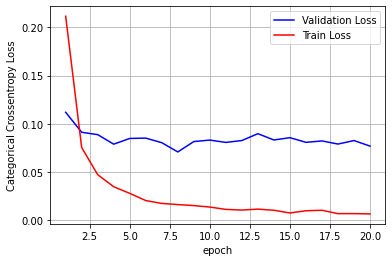

In [116]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

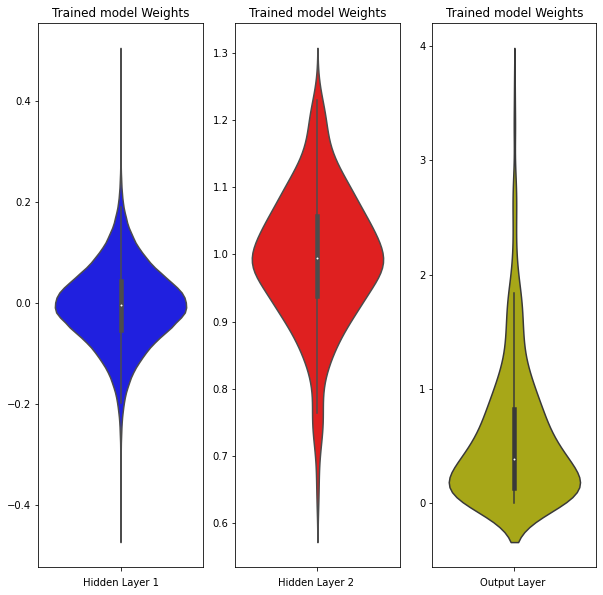

In [117]:
w_after = model_batch.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure(figsize=(10,10))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

**<h2> ReLU + Adam Optimization + 5 Hidden Layers (Batch Normalization)</h2>**

In [118]:
from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_batch.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(256, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(32, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_79 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_28 (Batc (None, 512)               2048      
_________________________________________________________________
dense_80 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_29 (Batc (None, 256)               1024      
_________________________________________________________________
dense_81 (Dense)             (None, 128)               32896     
_________________________________________________________________
batch_normalization_30 (Batc (None, 128)               512       
_________________________________________________________________
dense_82 (Dense)             (None, 64)              

In [119]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 166us/step - loss: 0.2957 - accuracy: 0.9186 - val_loss: 0.1249 - val_accuracy: 0.9658
Epoch 2/20
60000/60000 [==============================] - 9s 152us/step - loss: 0.0979 - accuracy: 0.9710 - val_loss: 0.1022 - val_accuracy: 0.9691
Epoch 3/20
60000/60000 [==============================] - 9s 152us/step - loss: 0.0676 - accuracy: 0.9790 - val_loss: 0.0939 - val_accuracy: 0.9710
Epoch 4/20
60000/60000 [==============================] - 9s 153us/step - loss: 0.0509 - accuracy: 0.9843 - val_loss: 0.0959 - val_accuracy: 0.9682
Epoch 5/20
60000/60000 [==============================] - 9s 153us/step - loss: 0.0365 - accuracy: 0.9881 - val_loss: 0.0879 - val_accuracy: 0.9741
Epoch 6/20
60000/60000 [==============================] - 9s 151us/step - loss: 0.0320 - accuracy: 0.9897 - val_loss: 0.0871 - val_accuracy: 0.9760
Epoch 7/20
60000/60000 [==============================] - 9s 

Test score: 0.07422380950862426
Test accuracy: 0.9815000295639038


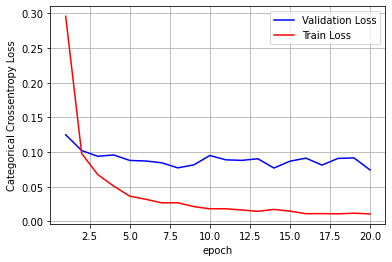

In [120]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

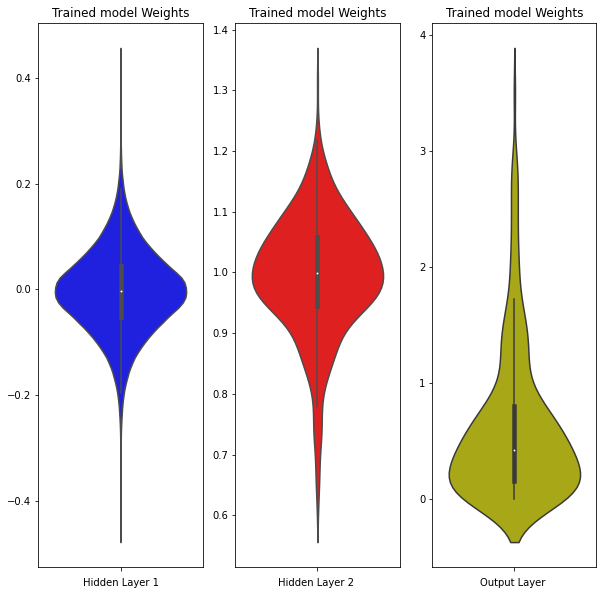

In [121]:
w_after = model_batch.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure(figsize=(10,10))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

**<h1> ReLU + Adam Optimization + 2 Hidden Layers (with Dropout and Batch Normalization)</h1>**

In [122]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(256, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_85 (Dense)             (None, 256)               200960    
_________________________________________________________________
batch_normalization_33 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_11 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_86 (Dense)             (None, 64)                16448     
_________________________________________________________________
batch_normalization_34 (Batc (None, 64)                256       
_________________________________________________________________
dropout_12 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_87 (Dense)             (None, 10)              

In [123]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 76us/step - loss: 0.6283 - accuracy: 0.8107 - val_loss: 0.2089 - val_accuracy: 0.9392
Epoch 2/20
60000/60000 [==============================] - 4s 71us/step - loss: 0.3279 - accuracy: 0.9043 - val_loss: 0.1595 - val_accuracy: 0.9493
Epoch 3/20
60000/60000 [==============================] - 4s 70us/step - loss: 0.2703 - accuracy: 0.9201 - val_loss: 0.1373 - val_accuracy: 0.9561
Epoch 4/20
60000/60000 [==============================] - 4s 70us/step - loss: 0.2330 - accuracy: 0.9319 - val_loss: 0.1144 - val_accuracy: 0.9645
Epoch 5/20
60000/60000 [==============================] - 4s 70us/step - loss: 0.2040 - accuracy: 0.9405 - val_loss: 0.1108 - val_accuracy: 0.9649
Epoch 6/20
60000/60000 [==============================] - 4s 70us/step - loss: 0.1898 - accuracy: 0.9439 - val_loss: 0.1002 - val_accuracy: 0.9708
Epoch 7/20
60000/60000 [==============================] - 4s 71us/st

Test score: 0.0712568270204123
Test accuracy: 0.9794999957084656


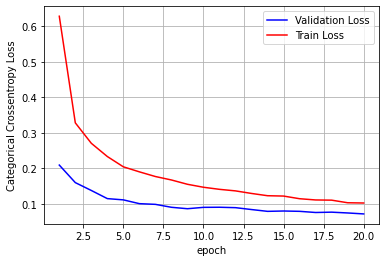

In [124]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

both training and validation loss keeps on decreasing with the increase in no of epochs and around 20epochs both the losses are pretty similar or almost the same

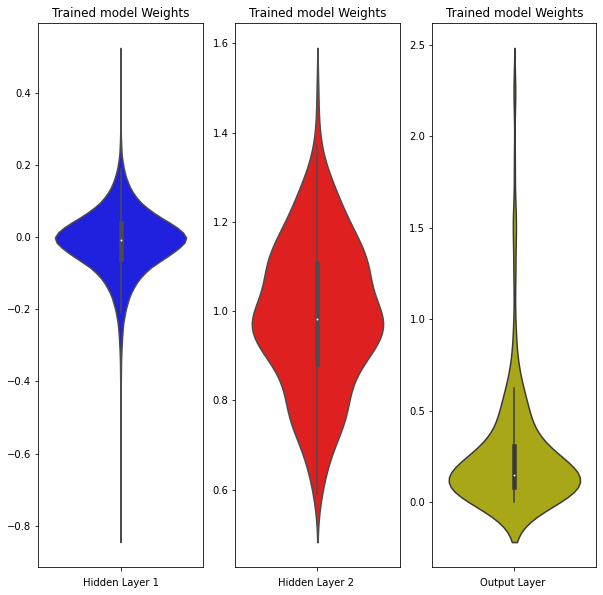

In [125]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure(figsize=(10,10))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

**<h1> ReLU + Adam Optimization + 3 Hidden Layers (with Dropout and Batch Normalization)</h1>**

In [126]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(256, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_88 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_35 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_13 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_89 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_36 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_14 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_90 (Dense)             (None, 128)             

In [127]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 163us/step - loss: 0.7715 - accuracy: 0.7613 - val_loss: 0.2116 - val_accuracy: 0.9358
Epoch 2/20
60000/60000 [==============================] - 9s 155us/step - loss: 0.3486 - accuracy: 0.8948 - val_loss: 0.1556 - val_accuracy: 0.9508
Epoch 3/20
60000/60000 [==============================] - 10s 163us/step - loss: 0.2721 - accuracy: 0.9203 - val_loss: 0.1334 - val_accuracy: 0.9579
Epoch 4/20
60000/60000 [==============================] - 10s 159us/step - loss: 0.2331 - accuracy: 0.9324 - val_loss: 0.1208 - val_accuracy: 0.9618
Epoch 5/20
60000/60000 [==============================] - 9s 153us/step - loss: 0.2010 - accuracy: 0.9418 - val_loss: 0.1079 - val_accuracy: 0.9667
Epoch 6/20
60000/60000 [==============================] - 9s 154us/step - loss: 0.1785 - accuracy: 0.9483 - val_loss: 0.0947 - val_accuracy: 0.9722
Epoch 7/20
60000/60000 [==============================] - 9

Test score: 0.06569366658385843
Test accuracy: 0.9818000197410583


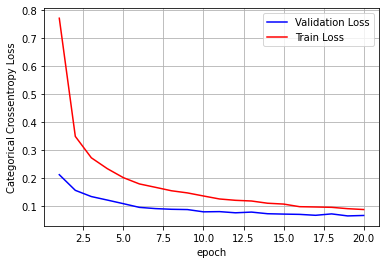

In [128]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

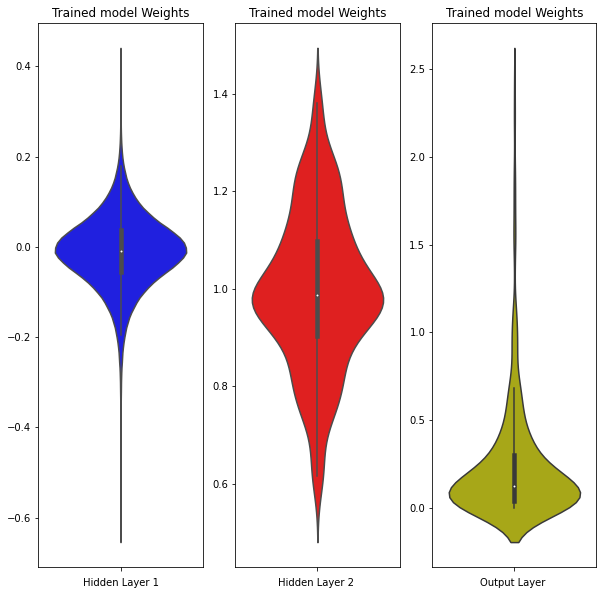

In [129]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure(figsize=(10,10))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

**<h1> ReLU + Adam Optimization + 5 Hidden Layers (with Dropout and Batch Normalization)</h1>**

In [130]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(256, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(32, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_92 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_38 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_16 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_93 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_39 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_17 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_94 (Dense)             (None, 128)             

In [131]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 11s 186us/step - loss: 2.0119 - accuracy: 0.3304 - val_loss: 0.7607 - val_accuracy: 0.8444
Epoch 2/20
60000/60000 [==============================] - 10s 166us/step - loss: 1.0764 - accuracy: 0.6406 - val_loss: 0.3660 - val_accuracy: 0.9143
Epoch 3/20
60000/60000 [==============================] - 10s 166us/step - loss: 0.7278 - accuracy: 0.7714 - val_loss: 0.2483 - val_accuracy: 0.9346
Epoch 4/20
60000/60000 [==============================] - 10s 166us/step - loss: 0.5533 - accuracy: 0.8357 - val_loss: 0.2000 - val_accuracy: 0.9451
Epoch 5/20
60000/60000 [==============================] - 10s 165us/step - loss: 0.4630 - accuracy: 0.8702 - val_loss: 0.1681 - val_accuracy: 0.9537
Epoch 6/20
60000/60000 [==============================] - 10s 165us/step - loss: 0.3948 - accuracy: 0.8964 - val_loss: 0.1581 - val_accuracy: 0.9583
Epoch 7/20
60000/60000 [==============================] 

Test score: 0.10285850774878635
Test accuracy: 0.9760000109672546


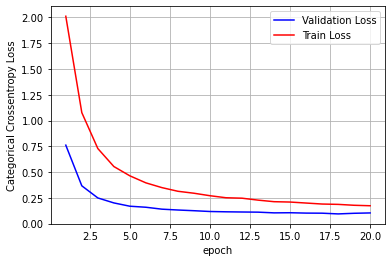

In [132]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

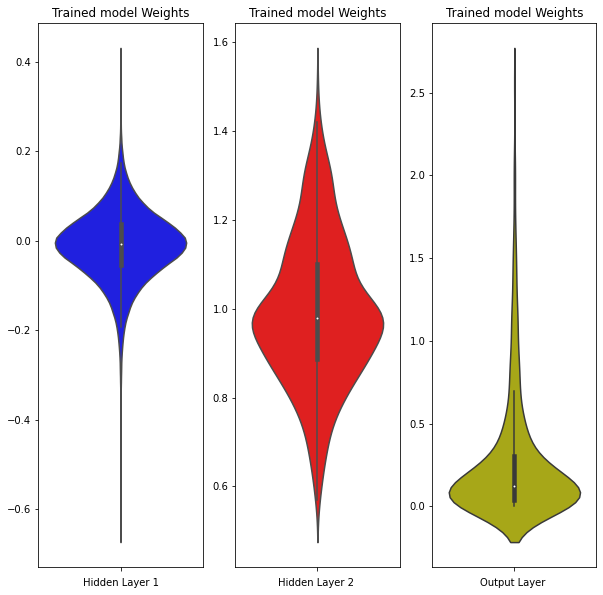

In [133]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure(figsize=(10,10))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

#We have 5 hidden layers but we are only plotting distribution of only two layers
plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

**<h2> Comparing models using prettytable library</h2>** 

**<h3>Without using Batch Normalization and Dropout</h3>**

In [140]:
from prettytable import PrettyTable
x=PrettyTable()

x.field_names=["#Layers","Architecture","Activation","Optimizer","Intializer","Test Score/Accuracy"] #column headers

x.add_row(["2", "256-64","Relu","Adam","RandomNormal","0.0899/0.980"])
x.add_row(["3", "512-256-128","Relu","Adam","RandomNormal","0.102/0.980"])
x.add_row(["5", "512-256-128-64-32","Relu","Adam","RandomNormal","0.076/0.982"])
print(x)

+---------+-------------------+------------+-----------+--------------+---------------------+
| #Layers |    Architecture   | Activation | Optimizer |  Intializer  | Test Score/Accuracy |
+---------+-------------------+------------+-----------+--------------+---------------------+
|    2    |       256-64      |    Relu    |    Adam   | RandomNormal |     0.0899/0.980    |
|    3    |    512-256-128    |    Relu    |    Adam   | RandomNormal |     0.102/0.980     |
|    5    | 512-256-128-64-32 |    Relu    |    Adam   | RandomNormal |     0.076/0.982     |
+---------+-------------------+------------+-----------+--------------+---------------------+


**<h3>Using Batch Normalization</h3>**

In [139]:
from prettytable import PrettyTable
x=PrettyTable()

x.field_names=["#Layers","Architecture","Activation","Optimizer","Intializer","Test Score/Accuracy"] #column headers

x.add_row(["2", "256-64","Relu","Adam","RandomNormal","0.0934/0.976"])
x.add_row(["3", "512-256-128","Relu","Adam","RandomNormal","0.076/0.981"])
x.add_row(["5", "512-256-128-64-32","Relu","Adam","RandomNormal","0.074/0.981"])
print(x)

+---------+-------------------+------------+-----------+--------------+---------------------+
| #Layers |    Architecture   | Activation | Optimizer |  Intializer  | Test Score/Accuracy |
+---------+-------------------+------------+-----------+--------------+---------------------+
|    2    |       256-64      |    Relu    |    Adam   | RandomNormal |     0.0934/0.976    |
|    3    |    512-256-128    |    Relu    |    Adam   | RandomNormal |     0.076/0.981     |
|    5    | 512-256-128-64-32 |    Relu    |    Adam   | RandomNormal |     0.074/0.981     |
+---------+-------------------+------------+-----------+--------------+---------------------+


**<h3>With using Batch Normalization and Dropout</h3>**

In [138]:
from prettytable import PrettyTable
x=PrettyTable()

x.field_names=["#Layers","Architecture","Activation","Optimizer","Intializer","Test Score/Accuracy"] #column headers

x.add_row(["2", "256-64","Relu","Adam","RandomNormal","0.0712/0.979"])
x.add_row(["3", "512-256-128","Relu","Adam","RandomNormal","0.065/0.981"])
x.add_row(["5", "512-256-128-64-32","Relu","Adam","RandomNormal","0.102/0.976"])
print(x)


+---------+-------------------+------------+-----------+--------------+---------------------+
| #Layers |    Architecture   | Activation | Optimizer |  Intializer  | Test Score/Accuracy |
+---------+-------------------+------------+-----------+--------------+---------------------+
|    2    |       256-64      |    Relu    |    Adam   | RandomNormal |     0.0712/0.979    |
|    3    |    512-256-128    |    Relu    |    Adam   | RandomNormal |     0.065/0.981     |
|    5    | 512-256-128-64-32 |    Relu    |    Adam   | RandomNormal |     0.102/0.976     |
+---------+-------------------+------------+-----------+--------------+---------------------+
